# Video Game Sales  [Exploratory Data Analysis (EDA)] 

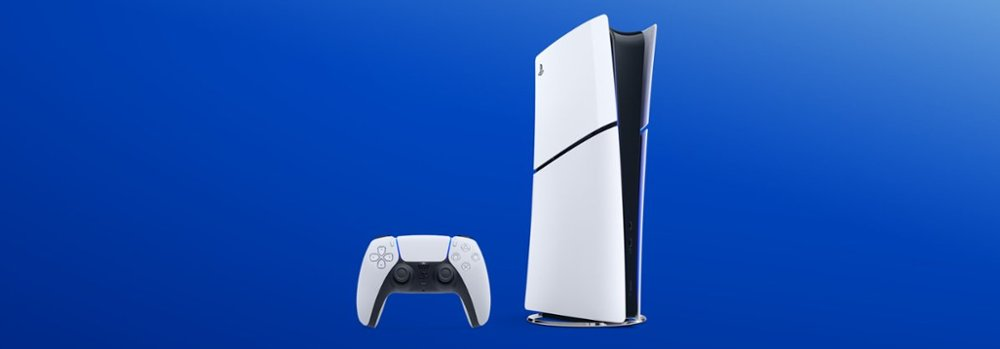!

In [1]:
# Importing  necessary Liabraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data 
data = pd.read_csv('vgsales.csv')


In [149]:
#first look at the data
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [14]:
# over view of the dataset

data.info()

# The output shows we have null values in 2 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Cleaning 


 Since we have few number of null value, we can drop them it will not make any difference in the analysis 

                        or 
 We can can replca null with mean or median : Data  Imputation 
 
    Mean or median :  Numberical (datatype)
    Mode           : Catagorical (datatype)
 
 - we use function : data_filled_mean = data.fillna(data.mean())


In [13]:
data = data.dropna()   # Removing the null Values 
data.isna().sum()      # to get the null count column wise 


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

##  Column Wise EDA (Exploratory data analysis):  
- Uni_variate Analysis (One column Analysis)
- By-Variate
- Multi-Variate analysis


####  Uni_variate Analysis (One column Analysis)




**1. Platform column**

- 1.  Which platform had the latest and earliest release and what were the sales of the games respectively in various parts of the world?

In [17]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
#How many unique platforms are present in the data?

print(data['Platform'].nunique())
print(data['Platform'].unique())

31
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [146]:
data['Year'].describe()

#The year of release for the earliest and latest is 1980, and 2020.

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [37]:
# Applying Filter and saving it to new DataFrames 

Earliest = data.loc[(data['Year'] == 1980)]
Latest = data.loc[(data['Year'] == 2020)]

In [150]:
Earliest.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76


In [39]:
# now to find out the the platfoms for both earliest and lates 

print('Earliest Release platfomrs are :', Earliest['Platform'].unique())
print('Earliest Release platfomrs are :',Latest['Platform'].unique())


Earliest Release platfomrs are : ['2600']
Earliest Release platfomrs are : ['DS']


In [169]:
# To calculate the sales in various regions, we will sum the values in each region

x =  ['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales' ]


Earliest_Sales_RegionsWise = [Earliest['NA_Sales'].sum(),
                               Earliest['EU_Sales'].sum(),
                               Earliest['JP_Sales'].sum(),
                               Earliest['Other_Sales'].sum()]

Latest_Sales_RegionsWise = [Latest['NA_Sales'].sum(),
                            Latest['EU_Sales'].sum(),
                            Latest['JP_Sales'].sum(),
                            Latest['Other_Sales'].sum()]



Axes(0.125,0.11;0.775x0.77)


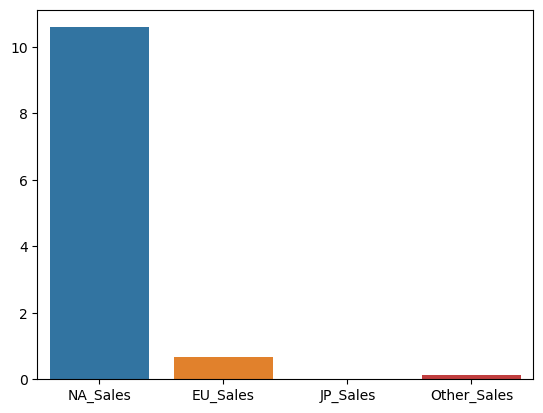

In [174]:
print(sns.barplot(x = x, y = Earliest_Sales_RegionsWise)) # Plot Earliest_Sales_RegionsWise
plt.show()

Axes(0.125,0.11;0.775x0.77)


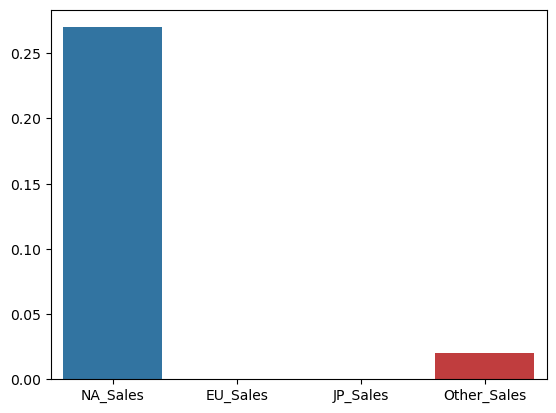

In [175]:
# Latest_Sales_RegionsWise
print(sns.barplot(x = x, y = Latest_Sales_RegionsWise))
plt.show()

<Axes: >

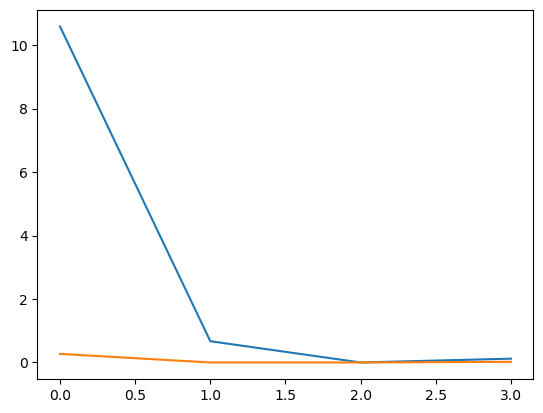

In [178]:
# Line plot  comparing both earliest and Latest 

sns.lineplot(Earliest_Sales_RegionsWise)
sns.lineplot(Latest_Sales_RegionsWise)

In [14]:
# ignore warnings
import warnings 

warnings.simplefilter(action='ignore', category=FutureWarning)

**Conclusion  : The earliest release had considerable sales in various parts of the world. But the latest release did not have a lot of sales compared to the earliest.  Matter of fact, the sales were less than 1 million in sales for the latest release.**

**2.  What was the most frequent platform, and how did it perform during the years in global sales and individual sales?**

In [21]:
data['Platform'].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

- Therefore DS has most number of counts 

In [16]:
 # now we will focus on the DS / Applying the filter on 

ds = data.loc[(data['Platform'] == 'DS')]
ds.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


In [17]:
ds['Year'].unique()

array([2006., 2005., 2010., 2009., 2004., 2007., 2012., 2008., 2011.,
       2013., 2020., 2014., 1985.])

In [30]:
final_NA = {1985: [], 2004:[], 2005: [], 2006: [], 2007: [], 2008:[], 2009: [], 2010: [], 2011: [], 2012:[], 2013: [], 2014: [], 2020: []}
final_EU = {1985: [], 2004:[], 2005: [], 2006: [], 2007: [], 2008:[], 2009: [], 2010: [], 2011: [], 2012:[], 2013: [], 2014: [], 2020: []}
final_JP = {1985: [], 2004:[], 2005: [], 2006: [], 2007: [], 2008:[], 2009: [], 2010: [], 2011: [], 2012:[], 2013: [], 2014: [], 2020: []}
final_Other = {1985: [], 2004:[], 2005: [], 2006: [], 2007: [], 2008:[], 2009: [], 2010: [], 2011: [], 2012:[], 2013: [], 2014: [], 2020: []}
final_Global = {1985: [], 2004:[], 2005: [], 2006: [], 2007: [], 2008:[], 2009: [], 2010: [], 2011: [], 2012:[], 2013: [], 2014: [], 2020: []}



In [31]:
for i in ds.iterrows():
    print(i[1])
    break

Rank                                7
Name            New Super Mario Bros.
Platform                           DS
Year                           2006.0
Genre                        Platform
Publisher                    Nintendo
NA_Sales                        11.38
EU_Sales                         9.23
JP_Sales                          6.5
Other_Sales                       2.9
Global_Sales                    30.01
Name: 6, dtype: object


In [32]:
import numpy as np  # Import numpy for handling NaN values

for i in ds.iterrows():
    year = i[1][3]
    final_NA.setdefault(year, []).insert(0, i[1][6])
    final_EU.setdefault(year, []).insert(0, i[1][7])
    final_JP.setdefault(year, []).insert(0, i[1][8])
    final_Other.setdefault(year, []).insert(0, i[1][9])
    final_Global.setdefault(year, []).insert(0, i[1][10])
   


In [33]:
for i in final_NA.keys():
  final_NA[i] = sum(final_NA[i])

for i in final_EU.keys():
  final_EU[i] = sum(final_EU[i])

for i in final_JP.keys():
  final_JP[i] = sum(final_JP[i])

for i in final_Other.keys():
  final_Other[i] = sum(final_Other[i])

for i in final_Global.keys():
  final_Global[i] = sum(final_Global[i])

In [34]:
final_NA

{1985: 0.0,
 2004: 8.42,
 2005: 48.470000000000006,
 2006: 50.63000000000001,
 2007: 76.36,
 2008: 79.39999999999998,
 2009: 62.41000000000001,
 2010: 42.36,
 2011: 15.29,
 2012: 4.18,
 2013: 0.7200000000000001,
 2014: 0.02,
 2020: 0.27}

<Axes: >

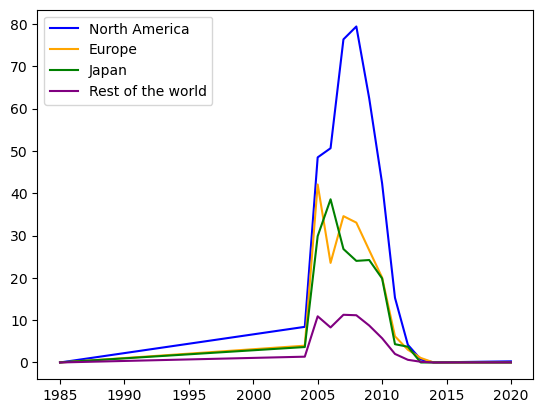

In [35]:
years = final_NA.keys()
sns.lineplot(data=final_NA, color='Blue', label='North America') #North America Sales
sns.lineplot(data=final_EU, color='Orange', label='Europe') #Europe Sales
sns.lineplot(data=final_JP, color='Green', label='Japan') #Japan Sales
sns.lineplot(data=final_Other, color='Purple', label='Rest of the world') #Rest of the world Sales

### OR

Text(0.5, 1.0, 'DS Platform : Regional Sales During the Years')

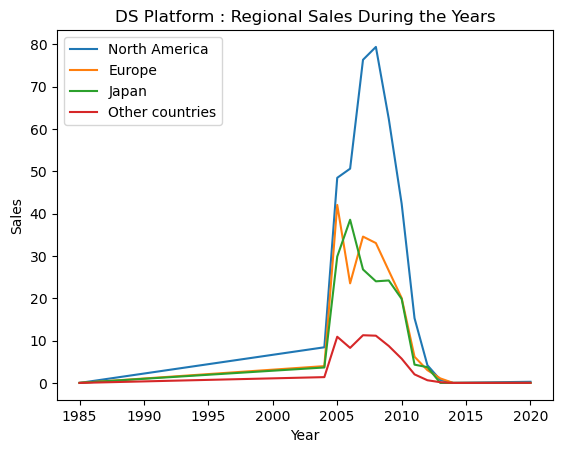

In [187]:

NA_Sales = ds.groupby('Year')['NA_Sales'].sum()
EU_Sales = ds.groupby('Year')['EU_Sales'].sum()
JP_Sales = ds.groupby('Year')['JP_Sales'].sum()
Other_Sales = ds.groupby('Year')['Other_Sales'].sum()
Global_Sales = ds.groupby('Year')['Global_Sales'].sum()


sns.lineplot(NA_Sales,label = 'North America')
sns.lineplot(EU_Sales, label = 'Europe')
sns.lineplot(JP_Sales,label = 'Japan')
sns.lineplot(Other_Sales,label = 'Other countries' )


plt.ylabel('Sales')
plt.title('DS Platform : Regional Sales During the Years')



#### Genre Column

What was the most frequent Genre, and how did it perform during the years in global sales and individual sales?

In [106]:
data['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [107]:
# lets do the analysis from action genre
action = data.loc[(data['Genre'] == 'Action')]

In [128]:
action = action.reset_index()

action.head(2)

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
1,17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


Text(0.5, 1.0, 'Action Genre : Regional  Sales During the Years')

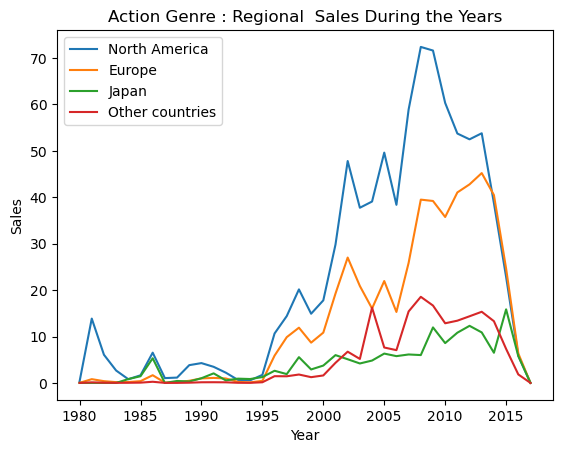

In [190]:

NA_Sales = action.groupby('Year')['NA_Sales'].sum()
EU_Sales = action.groupby('Year')['EU_Sales'].sum()
JP_Sales = action.groupby('Year')['JP_Sales'].sum()
Other_Sales = action.groupby('Year')['Other_Sales'].sum()
Global_Sales = action.groupby('Year')['Global_Sales'].sum()


sns.lineplot(NA_Sales,label = 'North America')
sns.lineplot(EU_Sales, label = 'Europe')
sns.lineplot(JP_Sales,label = 'Japan')
sns.lineplot(Other_Sales,label = 'Other countries' )


plt.ylabel('Sales')
plt.title('Action Genre : Regional  Sales During the Years')







### OR




In [58]:
years = list(action['Year'].unique())
years = sorted(years)
years

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [60]:
Final_NA = dict()
Final_EU = dict()
Final_JP = dict()
Final_Other = dict()
Final_Global = dict()

for i in years:
    Final_NA[i] = list()

for i in years:
  Final_EU[i] = list()

for i in years:
  Final_JP[i] = list()

for i in years:
  Final_Other[i] = list()

for i in years:
  Final_Global[i] = list()

In [61]:
Final_NA

{1980.0: [],
 1981.0: [],
 1982.0: [],
 1983.0: [],
 1984.0: [],
 1985.0: [],
 1986.0: [],
 1987.0: [],
 1988.0: [],
 1989.0: [],
 1990.0: [],
 1991.0: [],
 1992.0: [],
 1993.0: [],
 1994.0: [],
 1995.0: [],
 1996.0: [],
 1997.0: [],
 1998.0: [],
 1999.0: [],
 2000.0: [],
 2001.0: [],
 2002.0: [],
 2003.0: [],
 2004.0: [],
 2005.0: [],
 2006.0: [],
 2007.0: [],
 2008.0: [],
 2009.0: [],
 2010.0: [],
 2011.0: [],
 2012.0: [],
 2013.0: [],
 2014.0: [],
 2015.0: [],
 2016.0: [],
 2017.0: []}

In [62]:
# fill the values in list   

for i in action.iterrows():
  year = i[1][3]
  Final_NA[year].insert(0, i[1][6])
  Final_EU[year].insert(0, i[1][7])
  Final_JP[year].insert(0, i[1][8])
  Final_Other[year].insert(0, i[1][9])
  Final_Global[year].insert(0, i[1][10])

In [64]:
for i in Final_NA.keys():
  Final_NA[i] = sum(Final_NA[i])

for i in Final_EU.keys():
  Final_EU[i] = sum(Final_EU[i])

for i in Final_JP.keys():
  Final_JP[i] = sum(Final_JP[i])

for i in Final_Other.keys():
  Final_Other[i] = sum(Final_Other[i])

for i in Final_Global.keys():
  Final_Global[i] = sum(Final_Global[i])

In [68]:
Final_NA

{1980.0: 0.32,
 1981.0: 13.86,
 1982.0: 6.07,
 1983.0: 2.67,
 1984.0: 0.8,
 1985.0: 1.64,
 1986.0: 6.5200000000000005,
 1987.0: 1.04,
 1988.0: 1.1500000000000001,
 1989.0: 3.83,
 1990.0: 4.2700000000000005,
 1991.0: 3.4699999999999998,
 1992.0: 2.21,
 1993.0: 0.64,
 1994.0: 0.57,
 1995.0: 1.73,
 1996.0: 10.650000000000002,
 1997.0: 14.400000000000002,
 1998.0: 20.15,
 1999.0: 14.91,
 2000.0: 17.79,
 2001.0: 29.809999999999995,
 2002.0: 47.81,
 2003.0: 37.74000000000001,
 2004.0: 39.08,
 2005.0: 49.61999999999999,
 2006.0: 38.370000000000005,
 2007.0: 58.89999999999999,
 2008.0: 72.39,
 2009.0: 71.61,
 2010.0: 60.320000000000036,
 2011.0: 53.73,
 2012.0: 52.480000000000004,
 2013.0: 53.78999999999999,
 2014.0: 38.72999999999999,
 2015.0: 22.830000000000002,
 2016.0: 5.870000000000001,
 2017.0: 0.0}

<Axes: >

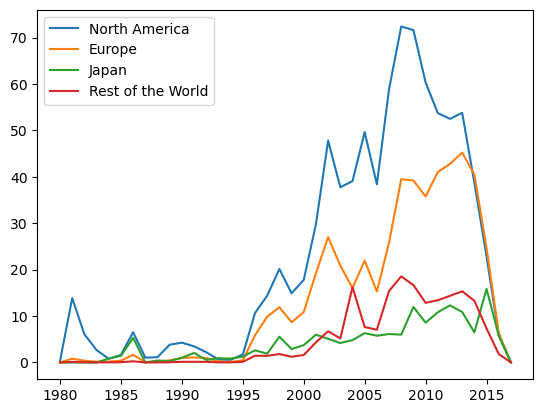

In [69]:
sns.lineplot(Final_NA, label="North America")
sns.lineplot(Final_EU, label="Europe")
sns.lineplot(Final_JP, label="Japan")
sns.lineplot(Final_Other, label='Rest of the World')

### Publisher Column 
- What was the most frequent Publisher, and how did it perform during the years in global sales and individual sales?

In [78]:
data['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

In [195]:
# the most frequent publisher is Electronic Arts, let's analyze their sales over the years.

EA = data.loc[(data['Publisher'] == 'Electronic Arts')]  # filter by Electronic art 
EA.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24


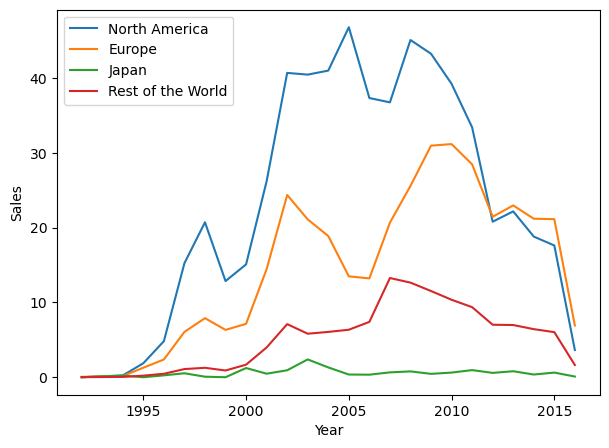

In [221]:
# Aggregate the sales year wise using groupby 

NA_Sales =  EA.groupby('Year')['NA_Sales'].sum()
EU_Sales =  EA.groupby('Year')['EU_Sales'].sum()
JP_Sales =  EA.groupby('Year')['JP_Sales'].sum()
Other_Sales =  EA.groupby('Year')['Other_Sales'].sum()
Global_Sales = EA.groupby('Year')['Global_Sales'].sum()


# PLot all the sales in line plot 
plt.figure(figsize =(7,5))
sns.lineplot(data = NA_Sales , label="North America")
sns.lineplot(data = EU_Sales, label="Europe")
sns.lineplot(data = JP_Sales,  label="Japan")
sns.lineplot(data = Other_Sales, label='Rest of the World')


plt.ylabel('Sales')
plt.show()

## OR

### Conclusion:

The line graph depicts sales trends from 1995 to 2015 in North America, Europe, Japan, and the rest of the world. 

key observations:

1. **North America**: Sales peaked around 2005 and have been declining since then.
2. **Europe and Rest of the World**: These regions show similar trends, with sales peaking around 2005 but at lower levels than North America. The decline afterward is less steep.
3. **Japan**: Sales remained relatively stable throughout the years, with slight fluctuations.

Overall, the data suggests that North America experienced the most significant decline in sales, while Europe, the rest of the world, and Japan had varying levels of stability or decline. 




In [214]:
years

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [215]:
# Create dictionarries fro all the sales regions 

EA_Final_NA = dict()
EA_Final_EU = dict()
EA_Final_JP = dict()
EA_Final_Other = dict()
EA_Final_Global = dict()

# for every key : years  creating a emty list so that we can add data later 

for i in years:
    EA_Final_NA[i] = list()

for i in years:
    EA_Final_EU[i]= list()

for i in years:
    EA_Final_JP[i]= list()

for i in years:
    EA_Final_Other[i]= list()

for i in years:
    EA_Final_Global[i] = list()


In [216]:
EA_Final_NA

{1980.0: [],
 1981.0: [],
 1982.0: [],
 1983.0: [],
 1984.0: [],
 1985.0: [],
 1986.0: [],
 1987.0: [],
 1988.0: [],
 1989.0: [],
 1990.0: [],
 1991.0: [],
 1992.0: [],
 1993.0: [],
 1994.0: [],
 1995.0: [],
 1996.0: [],
 1997.0: [],
 1998.0: [],
 1999.0: [],
 2000.0: [],
 2001.0: [],
 2002.0: [],
 2003.0: [],
 2004.0: [],
 2005.0: [],
 2006.0: [],
 2007.0: [],
 2008.0: [],
 2009.0: [],
 2010.0: [],
 2011.0: [],
 2012.0: [],
 2013.0: [],
 2014.0: [],
 2015.0: [],
 2016.0: [],
 2017.0: []}

In [217]:
# we need to fill sales data  in  the list  

for i in EA.iterrows():
  year = i[1][3]
  EA_Final_NA[year].insert(0, i[1][6])
  EA_Final_EU[year].insert(0, i[1][7])
  EA_Final_JP[year].insert(0, i[1][8])
  EA_Final_Other[year].insert(0, i[1][9])
  EA_Final_Global[year].insert(0, i[1][10])

# we need to aggregate the sales year wise 

for i in EA_Final_NA.keys():
  EA_Final_NA[i] = sum(EA_Final_NA[i])

for i in EA_Final_EU.keys():
  EA_Final_EU[i] = sum(EA_Final_EU[i])

for i in EA_Final_JP.keys():
  EA_Final_JP[i] = sum(EA_Final_JP[i])

for i in EA_Final_Other.keys():
  EA_Final_Other[i] = sum(EA_Final_Other[i])

for i in EA_Final_Global.keys():
  EA_Final_Global[i] = sum(EA_Final_Global[i])

In [219]:
EA_Final_NA

{1980.0: 0,
 1981.0: 0,
 1982.0: 0,
 1983.0: 0,
 1984.0: 0,
 1985.0: 0,
 1986.0: 0,
 1987.0: 0,
 1988.0: 0,
 1989.0: 0,
 1990.0: 0,
 1991.0: 0,
 1992.0: 0.0,
 1993.0: 0,
 1994.0: 0.24,
 1995.0: 1.87,
 1996.0: 4.819999999999999,
 1997.0: 15.25,
 1998.0: 20.720000000000002,
 1999.0: 12.860000000000001,
 2000.0: 15.089999999999998,
 2001.0: 26.209999999999997,
 2002.0: 40.699999999999996,
 2003.0: 40.470000000000006,
 2004.0: 41.01,
 2005.0: 46.81,
 2006.0: 37.34,
 2007.0: 36.76,
 2008.0: 45.099999999999994,
 2009.0: 43.26000000000002,
 2010.0: 39.239999999999995,
 2011.0: 33.42,
 2012.0: 20.8,
 2013.0: 22.180000000000007,
 2014.0: 18.81,
 2015.0: 17.62,
 2016.0: 3.6399999999999997,
 2017.0: 0}

<Axes: >

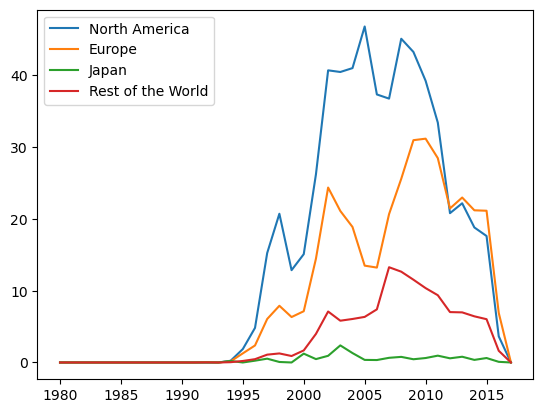

In [220]:
# now we will to plot 

sns.lineplot(EA_Final_NA, label="North America")
sns.lineplot(EA_Final_EU, label="Europe")
sns.lineplot(EA_Final_JP, label="Japan")
sns.lineplot(EA_Final_Other, label='Rest of the World')

In [210]:
data.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


**Years Column**

- let's find out which year saw the most and least global sales, EU sales, Japan Sales, etc.

In [223]:
data['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [ ]:
# in Year 2009 we have maximun number games published so we will analyze 

In [247]:
data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


Text(0.5, 1.0, 'Regional Sales During the Years')

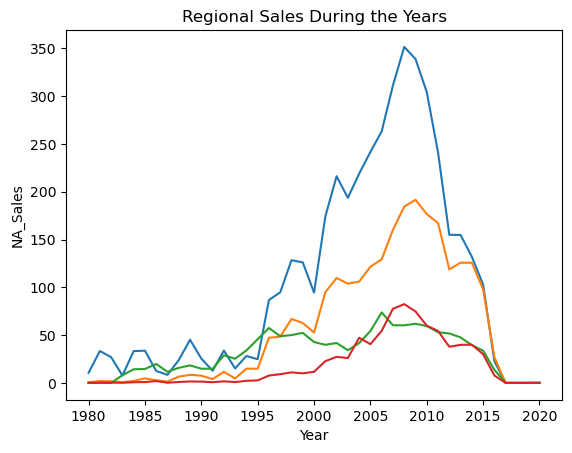

In [257]:
#  Sum up sales 


NA_Sales = data.groupby('Year')['NA_Sales'].sum()
EU_Sales = data.groupby('Year')['EU_Sales'].sum()
JP_Sales = data.groupby('Year')['JP_Sales'].sum()
Other_Sales = data.groupby('Year')['Other_Sales'].sum()
Global_Sales =  data.groupby('Year')['Global_Sales'].sum()
# plot the graph 

sns.lineplot(data = NA_Sales)
sns.lineplot(data = EU_Sales)
sns.lineplot(data = JP_Sales)
sns.lineplot(data = Other_Sales)
plt.title('Regional Sales During the Years')


Text(0.5, 1.0, 'Golbal Sales During the Years')

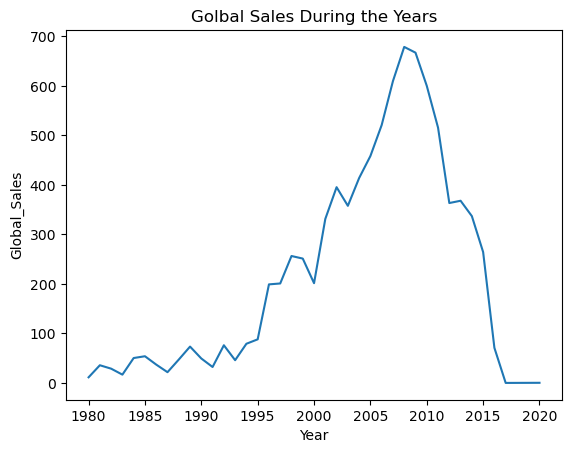

In [253]:
sns.lineplot(data = Global_Sales)
plt.title('Golbal Sales During the Years')

Key Observations:

1. **North America**: Sales in North America peaked around 2005 and have been declining since then. The decline is quite steep.

2. **Europe and Rest of the World**: These regions also experienced a peak in sales around 2005, but at lower levels compared to North America. The decline afterward is less pronounced.

3. **Japan**: Japan's sales remained relatively stable throughout the years, with minor fluctuations.

In summary:
- North America had the highest peak in sales but the most significant decline.
- Europe and the rest of the world followed a similar trend but with less intensity.
- Japan maintained stability in sales.

Overall, the data suggests that global sales peaked around the year 2000 and have been declining since then. ¹²


#### Year Wise Top selling and least selling games

In [481]:
# Find the game with the maximum global sales for each year
max_sales = data.loc[data.groupby("Year")["Global_Sales"].idxmax()][['Year', 'Name', 'Global_Sales']]
max_sales.columns = ['Year', 'Name_max', 'Global_Max_sales']

# Find the game with the minimum global sales for each year
min_sales = data.loc[data.groupby("Year")["Global_Sales"].idxmin()][['Year', 'Name', 'Global_Sales']]
min_sales.columns = ['Year', 'Name_min', 'Global_Min_sales']

# Merge the two DataFrames
mergd = pd.merge(min_sales, max_sales, on='Year', how='inner')
mergd

,Year,Name_min,Global_Min_sales,Name_max,Global_Max_sales
0,1980.0,Checkers,0.24,Asteroids,4.31
1,1981.0,RealSports Volleyball,0.13,Pitfall!,4.50
2,1982.0,Krull,0.14,Pac-Man,7.81
3,1983.0,Mr. Do!'s Castle,0.17,Baseball,3.20
4,1984.0,Beamrider,0.27,Duck Hunt,28.31
5,1985.0,Strongest Tokyo University Shogi DS,0.02,Super Mario Bros.,40.24
6,1986.0,RealSports Boxing,0.29,The Legend of Zelda,6.51
7,1987.0,Super Baseball,0.07,Zelda II: The Adventure of Link,4.38
8,1988.0,SimCity,0.03,Super Mario Bros. 3,17.28
9,1989.0,Adventures of Lolo,0.06,Tetris,30.26


Text(0, 0.5, 'Sales')

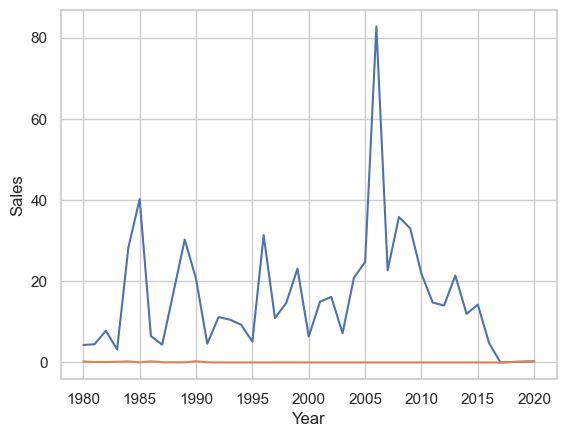

In [490]:
# Plot 

years = mergd['Year']
max_sales = mergd['Global_Max_sales']
min_sales = mergd['Global_Min_sales']


sns.lineplot(x= years, y =max_sales)
sns.lineplot(x= years, y =min_sales)
plt.ylabel('Sales')